In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline 

In [2]:
data=pd.read_csv('card transactions.csv')
data.shape

(96753, 18)

In [3]:
data = data[data['Transtype']=='P']
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96749,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96750,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96751,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# outlier = data['Amount'].nlargest(10)
# outlier

52714    3102045.53
47339      47900.00
59516      30372.46
80886      28392.84
89673      27218.00
1103       26910.00
89408      25805.35
69666      25000.00
10173      24990.00
46937      24946.90
Name: Amount, dtype: float64

In [4]:
data = data[data['Amount']!=3102045.53]
data['Merchnum']=data['Merchnum'].replace({'0':np.nan})
data['Merchnum'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_28953/2587180695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=data['Merchnum'].replace({'0':np.nan})


3251

In [6]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()][data['Merchnum'].notnull()]['Merch description'].items():
    if pd.isnull(merchdes) == True:
        continue
    elif merchdes not in merchdes_merchnum:
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']
merchdes_merchnum

{'FEDEX SHP 12/23/09 AB#': '5509006296254',
 'SERVICE MERCHANDISE #81': '61003026333',
 'OFFICE DEPOT #191': '4503082993600',
 'FEDEX SHP 12/28/09 AB#': '5509006296254',
 'FEDEX SHP 12/22/09 AB#': '5509006296254',
 'MIAMI COMPUTER SUPPLY': '6098208200062',
 'FISHER SCI ATL': '602608969534',
 'FEDEX SHP 12/21/09 AB#': '5509006296254',
 'CDW*GOVERNMENT INC': '5725000466504',
 'FISHER SCI HUS': '602608969284',
 'AMAZON.COM  *SUPERSTRE': '4353000719908',
 'FEDEX SHP 12/14/09 AB#': '5509006296254',
 'DIRKS PLUMBING/HEATING REPAIRS': '4503738417400',
 'COM*COMARK GVT ED SALE': '7234000681204',
 'FISHER SCI DAL': '602608969739',
 'PTK*PUBLISH PERFECTION': '3443000643641',
 'FEDEX SHP 12/27/09 AB#': '5509006296254',
 'MWI*DATA COM': '9765000409955',
 'FISHER SCI CHI': '602608969138',
 'FERGUSON ENTERPRISES I': '602608038586',
 'IBM INTERNET  01000025': '5000006000095',
 'HEWLETT PACKARD CO': '9050153',
 'MTT*SKYTEL': '3397000747409',
 'RADIO SHACK   00187278': '4800000627972',
 'SOCIETY OF TOX

In [62]:
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2620706319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))


In [63]:
data['Merchnum'].isnull().sum()

2094

In [64]:
data['Merchnum']=data['Merchnum'].mask(data['Merch description']=='RETAIL CREDIT ADJUSTMENT','Unknown')
data['Merchnum']=data['Merchnum'].mask(data['Merch description']=='RETAIL DEBIT ADJUSTMENT','Unknown')
data['Merchnum'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2843429687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=data['Merchnum'].mask(data['Merch description']=='RETAIL CREDIT ADJUSTMENT','Unknown')
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2843429687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=data['Merchnum'].mask(data['Merch description']=='RETAIL DEBIT ADJUSTMENT','Unknown')


1403

In [65]:
data.loc[data.Merchnum.isna(),'Merch description'].unique()[:20]

array(['MONTGOMERY COLLEGE-PHONE', 'PACKAGE PLACE  THE',
       'CUBIX CORPORATION', 'SIGNAL GRAPHICS PRINTING',
       'C & M OFFICE EQUIPMENT', "TOMMY'S TRAILERS",
       'Z WORLD/RABBIT SEMICONDUC', 'IMPAC/TRI-COUNTY/FREED',
       'REPROGRPHC TECHNLGIES INC', 'STP SPECIALITY TECH',
       'VANGARD INTERNAITONAL', 'BLACKWELL SCIENCE', 'CDN ISOTOPES INC',
       'INTERACTIVE SOFTWARE S', 'H R WILLIAMS MILL SUPP',
       'ELSEVIER SCIENCE BV', 'COLORADO GARDEN SHOW',
       'PEARSON EDUCATION CANADA', 'PONTOTOC AREA VO-TECH',
       'NATIONAL BAG COMPANY'], dtype=object)

In [66]:
merchnum_create={}
max_merchnum=pd.to_numeric(data.Merchnum,errors='coerce').max()
for merch_desc in data.loc[data.Merchnum.isna(),'Merch description'].unique():
    merchnum_create[merch_desc]=str(int(max_merchnum+1))
    max_merchnum += 1  
data['Merchnum']=data['Merchnum'].fillna(data['Merch description'].map(merchnum_create))
for i in data.columns:
    print(i,data[i].isnull().sum())

Recnum 0
Cardnum 0
Date 0
Merchnum 0
Merch description 0
Merch state 1020
Merch zip 4300
Transtype 0
Amount 0
Fraud 0
Unnamed: 10 96397
Unnamed: 11 96397
Unnamed: 12 96397
Unnamed: 13 96397
Unnamed: 14 96397
Unnamed: 15 96397
Unnamed: 16 96397
Unnamed: 17 96397


/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3758449561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merchnum']=data['Merchnum'].fillna(data['Merch description'].map(merchnum_create))


In [67]:
#Clean and Impute State
data['Merch state'].isnull().sum()

1020

In [68]:
zip_state = {}
for index,zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:zip_state[zip5]=data.loc[index,'Merch state']

zip_state['00926']='PR'
zip_state['00929']='PR'
zip_state['00934']='PR'
zip_state['00902']='PR'
zip_state['00738']='PR'
zip_state['90805']='CA'
zip_state['76302']='TX'
zip_state['00914']='PR'
zip_state['95461']='CA'
zip_state['00680']='PR'
zip_state['00623']='PR'
zip_state['00726']='PR'
zip_state['00936']='PR'
zip_state['12108']='NY'
zip_state['00791']='PR'
zip_state['00907']='PR'
zip_state['00922']='PR'
zip_state['00920']='PR'
zip_state['00801']='VI'
zip_state['31040']='GA'
zip_state['41160']='KY'
zip_state['00681']='PR'

In [69]:
merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state:
        merchnum_state[merchnum]=data.loc[index,'Merch state']
        
merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state:
        merchdes_state[merchdes]=data.loc[index,'Merch state']
        
        
data['Merch state']=data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state']=data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state']=data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

data['Merch state']=data['Merchnum'].mask(data['Merch description']=='RETAIL CREDIT ADJUSTMENT','Unknown')
data['Merch state']=data['Merchnum'].mask(data['Merch description']=='RETAIL DEBIT ADJUSTMENT','Unknown')
data['Merch state'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2697117003.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state']=data['Merch state'].fillna(data['Merch zip'].map(zip_state))
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2697117003.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state']=data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2697117003.py:14: SettingW

0

In [71]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC','DE', 'FL', 'GA', 
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
          'VI','PR', np.nan,'unknown']

for index,state in data['Merch state'].items():
    if state not in states:
        data.loc[index,'Merch state']='foreign'
data['Merch state'].fillna('unknown',inplace=True)
data['Merch state'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/902663538.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch state'].fillna('unknown',inplace=True)


0

In [72]:
#clean and impute zip
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip:
        merchnum_zip[merchnum]=data.loc[index,'Merch zip']
        
merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip:
        merchdes_zip[merchdes]=data.loc[index,'Merch zip']

data['Merch zip']=data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip']=data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))
data['Merch zip'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/772957373.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip']=data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/772957373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip']=data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))


2658

In [73]:
data['Merch zip']=data['Merch zip'].mask(data['Merch zip']=='RETAIL CREDIT ADJUSTMENT','Unknown')
data['Merch zip']=data['Merch zip'].mask(data['Merch zip']=='RETAIL DEBIT ADJUSTMENT','Unknown')

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3861632712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip']=data['Merch zip'].mask(data['Merch zip']=='RETAIL CREDIT ADJUSTMENT','Unknown')
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3861632712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip']=data['Merch zip'].mask(data['Merch zip']=='RETAIL DEBIT ADJUSTMENT','Unknown')


In [105]:
data['Merch zip'].fillna('unknown',inplace=True)
data['Merch zip'].isnull().sum()

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3947621640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Merch zip'].fillna('unknown',inplace=True)


0

## Benford's Law

In [89]:
import math

In [90]:
bf=data.copy()
bf['amount_100'] = (bf['Amount'] * 100).astype(str)
bf['first_digit'] = bf['amount_100'].str[0]
dropfedex = bf[bf['Merch description'].str.contains( 'FEDEX')]
droplist = dropfedex.index.tolist()
bfl = bf.drop(droplist)
bfl['bin']= bfl['first_digit'].apply(lambda x: "low" if x == "1" else ("low" if x == "2" else "high"))


card_bf = bfl.groupby(['Cardnum','bin']).agg({'bin': ['count']}).reset_index()
card_bf.columns=['Cardnum', 'bin', 'count']
card_bf = card_bf.pivot_table(index='Cardnum', columns='bin', values='count', aggfunc='sum').reset_index()
card_bf.columns= [ 'Cardnum', 'n_high', 'n_low']
card_bf=card_bf.fillna(1)
# calclating R, 1/R, U, n, t U_smoothed
c=3
n_mid=15
card_bf['R'] = (1.096 * card_bf['n_low']/card_bf ['n_high'])
card_bf['1/R'] = (1/card_bf['R'])
card_bf['U']=list(map(lambda x, y : max(x,y), card_bf['R'],card_bf['1/R']))
card_bf['n'] = card_bf['n_high'] + card_bf['n_low']
card_bf['t'] =((card_bf['n']-n_mid)/c)
card_bf['U_smoothed' ]= list(map(lambda x, y : (1 + (x-1)/(1+math.exp(-y))),card_bf[ 'U'],card_bf['t']))
card_bf['U_smoothed'] = card_bf[ 'U_smoothed']


merch_bf = bfl.groupby(['Merchnum', 'bin']).agg({'bin': ['count']}).reset_index()
merch_bf.columns= [ 'Merchnum','bin', 'count']
merch_bf = merch_bf.pivot_table(index='Merchnum', columns='bin', values='count', aggfunc='sum').reset_index()
merch_bf.columns= [ 'Merchnum', 'n_high', 'n_low']
merch_bf=merch_bf.fillna (1)
# calclating R, 1/R, U, n, t U_smoothed
merch_bf[ 'R']=(1.096* merch_bf[ 'n_low']/merch_bf['n_high'])
merch_bf['1/R'] = (1/merch_bf[ 'R'])
merch_bf[ 'U']=list (map(lambda x, y : max(x,y), merch_bf['R'], merch_bf ['1/R']))
merch_bf['n'] = merch_bf['n_high'] + merch_bf[ 'n_low']
merch_bf['t'] = ((merch_bf[ 'n' ]-n_mid)/c)
merch_bf[ 'U_smoothed']= list(map(lambda x, y : (1 + (x-1)/(1+math.exp(-y))), merch_bf[ 'U' ], merch_bf['t']))
merch_bf[ 'U_smoothed'] = merch_bf['U_smoothed']
card_bf[ 'Cardnum'] = card_bf [ 'Cardnum'].apply(str)
merch_bf['Merchnum']=merch_bf['Merchnum'].apply(str)
card_bf.set_index('Cardnum', inplace=True)
card_Ustar = pd.DataFrame (card_bf ['U_smoothed'])
card_Ustar.sort_values(['U_smoothed'], ascending= False).head (3)

,U_smoothed
Cardnum,
5142253356,13.371199
5142299705,9.027976
5142197563,8.150852


In [91]:
merch_bf.set_index( 'Merchnum', inplace=True)
merch_Ustar=pd.DataFrame(merch_bf['U_smoothed'])
merch_Ustar.sort_values(['U_smoothed'], ascending = False).head(3)

,U_smoothed
Merchnum,
991808369338,165.145985
8078200641472,64.663981
308904389335,48.357557


In [174]:
final = data.iloc[:,:10].copy()
final['Cardnum'] = final['Cardnum'].apply(str)
final['Merchnum'] = final['Merchnum'].apply(str)
final = final.merge(card_Ustar, how='left', left_on='Cardnum', right_on=card_Ustar.index)
final = final.rename(columns={'U_smoothed': 'U*_cardnum'})
final = final.merge(merch_Ustar, how='left', left_on='Merchnum', right_on=merch_Ustar.index)
final = final.rename(columns={'U_smoothed': 'U*_merchnum'})

In [175]:
final = final.fillna(1)

In [176]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,U*_cardnum,U*_merchnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,2.178008,1.000000
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,foreign,1803.0,P,31.42,0,1.604857,1.001244
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,foreign,20706.0,P,178.49,0,2.368143,1.025818
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,foreign,38118.0,P,3.62,0,1.044105,1.000000
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,2.178008,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,foreign,41042.0,P,84.79,0,1.002393,1.001244
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,foreign,45248.0,P,118.75,0,1.137948,1.288057
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",foreign,45150.0,P,363.56,0,1.201338,1.106055
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,foreign,92656.0,P,2202.03,0,1.499767,1.029441


In [207]:
final['Cardnum']=final['Cardnum'].apply(str)
final['Merchnum']=final['Merchnum'].apply(str)
final['Merch zip']=final['Merch zip'].apply(str)
final['card_merch'] = final['Cardnum']+ final['Merchnum']
final['card_zip'] = final['Cardnum'] + final['Merch zip']
final['card_state'] = final['Cardnum'] + final['Merch state']
final['merch_zip'] = final['Merchnum'] + final['Merch zip']
final['merch_state'] = final['Merchnum'] + final['Merch state']

## Target Encoded Day of Week Variables

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3624725258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3624725258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3624725258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

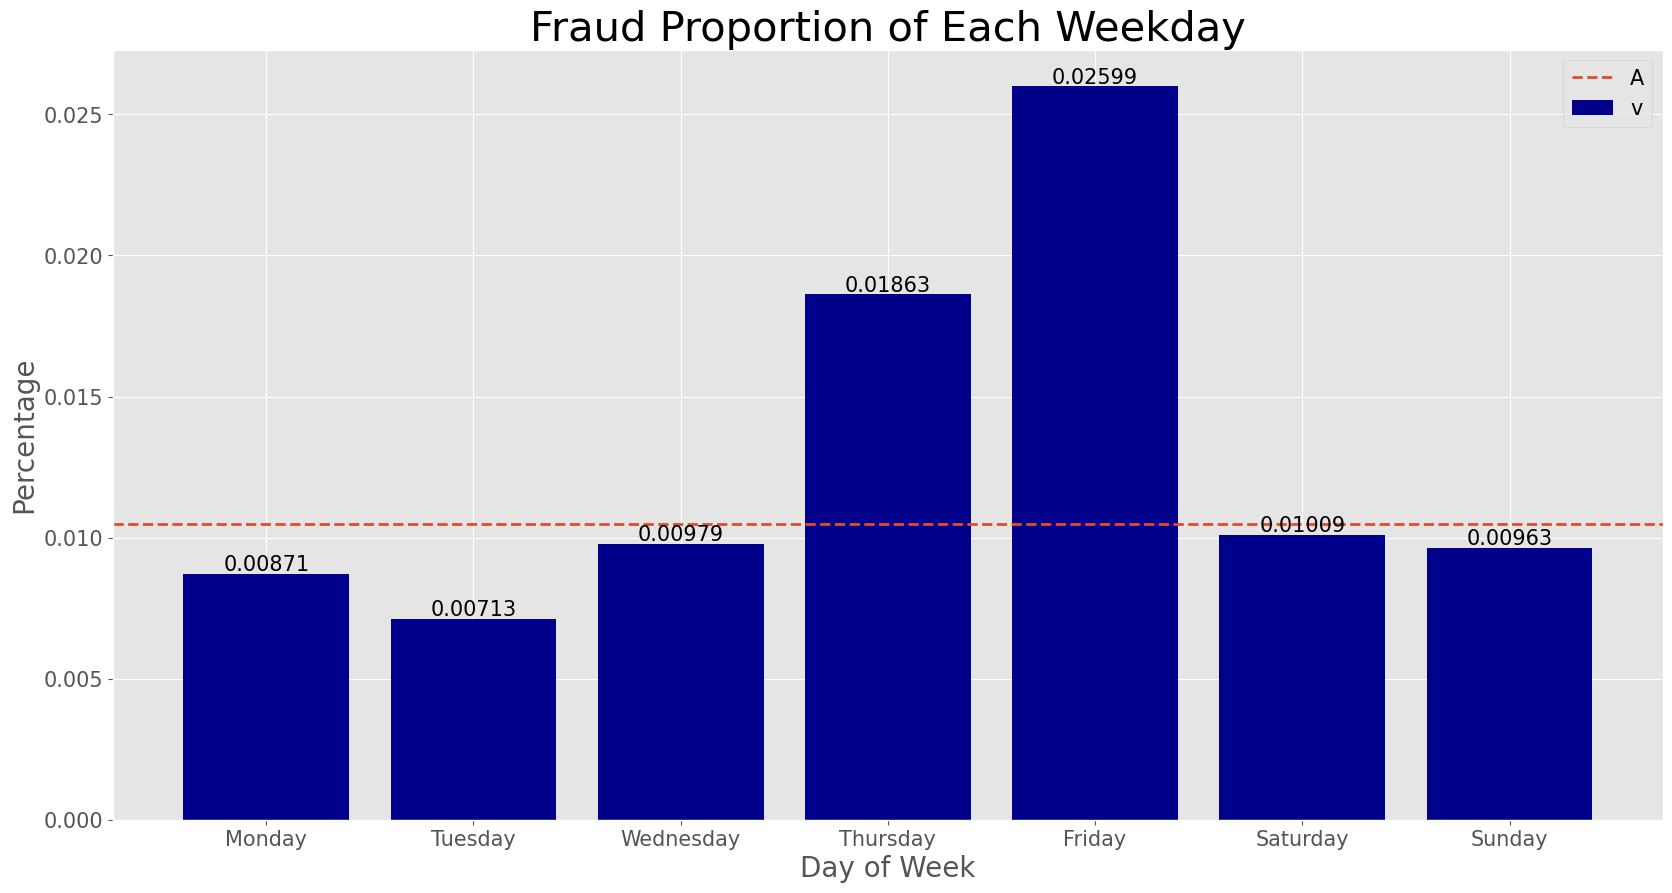

In [208]:
data['Date'] = pd.to_datetime(data['Date'])
data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])
train_test=data[data.Date<'2010-11-01']
c=4;nmid=20;y_avg=train_test['Fraud'].mean()
y_dow=train_test.groupby('dow')['Fraud'].mean()
num=train_test.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='Fraud',color='darkblue')

ax.axhline(y=y_avg,ls='--',lw=2,label='Average Fraud Population')

for i,v in enumerate(y_dow.index):
    ax.text(v,y_dow.loc[v,'Fraud']+0.0001,round(y_dow.loc[v,'Fraud'],5),horizontalalignment='center',fontsize=15)
    
plt.legend('Average Fraud Population',fontsize=15)
plt.xlabel('Day of Week',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fraud Proportion of Each Weekday",fontsize=30)
plt.show()

## Make Variables

In [209]:
import timeit

In [210]:
df1 = final.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum


entities = ['Cardnum', 'Merchnum', 'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state']
start = timeit.default_timer()
for entity in entities:    
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]       
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')

Run time for the last entity ----------------- 471.1235713749993s

Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_count_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_count_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_count_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_count_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_count_30 ---> Done
Cardnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 5.247190500005672s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Done
Merchnum amount variables over past 1 ---> Done
Merchnum_count_3 ---> Done
Merchnum amount variables over past 3 ---> Done
Merchnum_count_7 ---> Done
Merchnum amount variables over past 7 ---> Done
Merchnum_count_14 ---> Done
Merchnum amount variables over past 14 

In [211]:
start = timeit.default_timer()
# velocity change variables
for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)

In [212]:
start = timeit.default_timer()
# velocity days since ratio
for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_vdratio_' + d  + 'by' + dd] =\
            final[ent + '_count_' + d + '_by_' + dd]/(final[ent + '_day_since']+1)

In [213]:
# Cross entity uniqueness variables
for entity in entities: 
    for field in entities:
        st = timeit.default_timer()
        if entity != field:
            new_attributes = f'{entity}_{field}_nunique'
            if new_attributes not in list(final.columns):
                mapper3 = final.groupby(entity)[field].nunique()
                final[new_attributes] = final[entity].map(mapper3)
        print(f'Run time for entity {entity} in field {field}'+ ' ---> Done')

Run time for entity Cardnum in field Cardnum ---> Done
Run time for entity Cardnum in field Merchnum ---> Done
Run time for entity Cardnum in field card_merch ---> Done
Run time for entity Cardnum in field card_zip ---> Done
Run time for entity Cardnum in field card_state ---> Done
Run time for entity Cardnum in field merch_zip ---> Done
Run time for entity Cardnum in field merch_state ---> Done
Run time for entity Merchnum in field Cardnum ---> Done
Run time for entity Merchnum in field Merchnum ---> Done
Run time for entity Merchnum in field card_merch ---> Done
Run time for entity Merchnum in field card_zip ---> Done
Run time for entity Merchnum in field card_state ---> Done
Run time for entity Merchnum in field merch_zip ---> Done
Run time for entity Merchnum in field merch_state ---> Done
Run time for entity card_merch in field Cardnum ---> Done
Run time for entity card_merch in field Merchnum ---> Done
Run time for entity card_merch in field card_merch ---> Done
Run time for enti

In [214]:
# variability
for entity in entities:
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: 
        print('')
    st = timeit.default_timer() 
    df_l = df1[['Recnum', 'Date', entity,'Amount']]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    
    for time in [0,1,3,7,14,30]:
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', 'check_record',entity, 'Amount_x','Amount_y']]
        temp2['Amount_diff']=temp2['Amount_y']-temp2['Amount_x']

        col_name = entity + '_variability_avg_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].mean()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        col_name = entity + '_variability_max_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].max()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        col_name = entity + '_variability_med_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].median()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')


Run time for the last entity ----------------- 2.958711083003436s
Cardnum_variability_avg_0 ---> Done
Cardnum_variability_max_0 ---> Done
Cardnum_variability_med_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_variability_avg_1 ---> Done
Cardnum_variability_max_1 ---> Done
Cardnum_variability_med_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_variability_avg_3 ---> Done
Cardnum_variability_max_3 ---> Done
Cardnum_variability_med_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_variability_avg_7 ---> Done
Cardnum_variability_max_7 ---> Done
Cardnum_variability_med_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_variability_avg_14 ---> Done
Cardnum_variability_max_14 ---> Done
Cardnum_variability_med_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_variability_avg_30 ---> Done
Cardnum_variability_max_30 ---> Done
Cardnum_variability_med_30 ---> Done
Cardnum amount variables over past 30 ---> D

In [215]:
# frequencies
df2 = data.copy()
df2['check_date'] = df2.Date
df2['check_recnum'] = df2.Recnum
df_2 = df2[['Recnum', 'Date', 'Amount', 'Cardnum', 'Merchnum']]
df_s = df2[['check_recnum', 'check_date', 'Amount', 'Cardnum', 'Merchnum']]
temp2 = pd.merge(df_2, df_s, left_on = 'Cardnum', right_on = 'Cardnum')

#Frequency Mappers
# groupers = ['Cardnum', 'Merchnum']
groupers = ['Cardnum']
for grouper in groupers: 
    for d in [0,1]:
        for dd in [3,7,14,30]:
            numerator_df = temp2[(temp2.check_date >= (temp2.Date - dt.timedelta(d)))
                               & (temp2.Recnum >= temp2.check_recnum)]
            denominator_df = temp2[(temp2.check_date >= (temp2.Date - dt.timedelta(dd)))
                               & (temp2.Recnum >= temp2.check_recnum)]

            numerator = numerator_df.groupby(grouper)['Recnum'].count()
            denominator = denominator_df.groupby(grouper)['Recnum'].count()/dd

            colname = 'relative_velocity_count_by_' + grouper + '_' + str(d) + '_days_over_' + str(dd)

            final[colname] = final[grouper].map(numerator)/final[grouper].map(denominator)

In [216]:
for i in entities:
    for v in entities:
        if i==v:
            continue
        else:
            df_c=df1[['Recnum','Date',i]]
            df_d=df1[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
            
        for t in [1,3,7,14,30,60]:
            count_day_df=temp[(temp.check_date>=(temp.Date-dt.timedelta(t)))&(temp.Recnum>=temp.check_record)]
            col_name=f'{i}_unique_count_for_{v}_{t}'
            mapper=count_day_df.groupby(['Recnum'])[v].nunique()
            final[col_name]=final.Recnum.map(mapper)

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2430850092.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

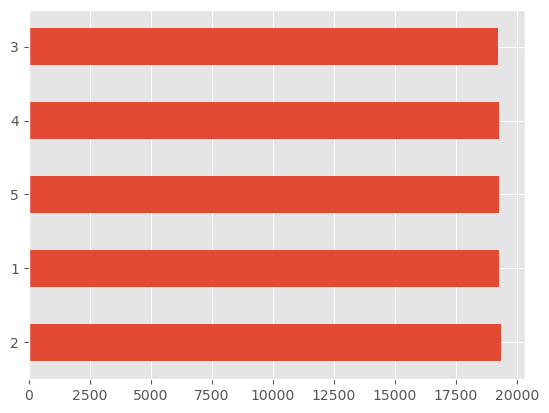

In [217]:
# Amount bins
AMOUNT = True
if AMOUNT:
      final['amount_cat'] = pd.qcut(final.Amount, q=5,labels=[1,2,3,4,5])
      
      final['amount_cat'].value_counts().plot(kind='barh')
      plt.show()
      
      qcut_series, qcut_intervals = pd.qcut(final.Amount, q=5,labels=[1,2,3,4,5],retbins=True)
      
      qcut_series.value_counts()

In [220]:
# acceleration
for ent in entities:
    print(ent)
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd + "_sq"] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/pow(float(dd),2)

Cardnum
Merchnum
card_merch
card_zip
card_state
merch_zip
merch_state


/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3361502282.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent + '_count_' + d + '_by_' + dd + "_sq"] =\
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3361502282.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent + '_count_' + d + '_by_' + dd + "_sq"] =\
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/3361502282.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

In [221]:
final.shape

(96397, 958)

In [223]:
final.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merch_zip_count_0_by_30_sq,merch_zip_count_1_by_7_sq,merch_zip_count_1_by_14_sq,merch_zip_count_1_by_30_sq,merch_state_count_0_by_7_sq,merch_state_count_0_by_14_sq,merch_state_count_0_by_30_sq,merch_state_count_1_by_7_sq,merch_state_count_1_by_14_sq,merch_state_count_1_by_30_sq
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,foreign,1803.0,P,31.42,0,...,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,foreign,20706.0,P,178.49,0,...,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,foreign,38118.0,P,3.62,0,...,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,foreign,38118.0,P,3.62,0,...,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111,0.020408,0.005102,0.001111


In [237]:
# My own variables
for i in entities:
    for v in ['1','3','7','30']:
        mapper=final.groupby(i)[i+'_count_'+v].max()
        mapper_mean=final.groupby(i)[i+'_count_'+v].mean()
        mapper_min=final.groupby(i)[i+'_count_'+v].min()
        final['max_count_by_'+i+'_'+v]=final[i].map(mapper)
        final['mean_count_by_'+i]=final[i].map(mapper_mean)
        final['min_count_by_'+i]=final[i].map(mapper_min)

/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2198588989.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final['mean_count_by_'+i]=final[i].map(mapper_mean)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2198588989.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final['min_count_by_'+i]=final[i].map(mapper_min)
/var/folders/_k/pq4pbdqj70bfr1p7vpgtnjgr0000gn/T/ipykernel_9218/2198588989.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [238]:
final.shape

(96397, 1014)

In [236]:
final.to_csv('card_transaction_vars.csv',index=False)